# Classificação – Game of Thrones: Predição de Cultura de Personagens

Este notebook implementa a parte de **classificação** do trabalho, utilizando um dataset do Kaggle com informações sobre personagens de *Game of Thrones*.  
O objetivo é comparar dois algoritmos de classificação supervisionada na tarefa de prever a **cultura** de cada personagem a partir de atributos sociais, familiares, de popularidade e presença nos livros.


In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd


file_path = "character-predictions.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "mylesoneill/game-of-thrones",
    file_path,
)

pd.set_option("display.max_columns", None)
df.head()

Using Colab cache for faster access to the 'game-of-thrones' dataset.


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

### Descrição do dataset de classificação

O dataset utilizado nesta parte do trabalho é o **"Game of Thrones Character Predictions"**, disponível no Kaggle.  
Ele contém informações sobre personagens do universo de *A Song of Ice and Fire* / *Game of Thrones*, incluindo:

- **Atributos sociais**: `title` (título do personagem, como *Lord*, *Ser*, *Queen* etc.), `male` (gênero), `isMarried` (se é casado), `isNoble` (se pertence à nobreza).
- **Atributos familiares**: `numDeadRelations` (número de parentes mortos).
- **Atributos de popularidade**: `isPopular` (se o personagem é popular) e `popularity` (pontuação contínua de popularidade).
- **Atributos narrativos**: `book1` a `book5` indicam em quais livros da saga o personagem aparece.

A variável alvo escolhida foi **`culture`**, que representa a **origem/cultura** do personagem (por exemplo: *Northmen*, *Dornish*, *Rivermen*, etc.).

O problema a ser resolvido é um problema de **classificação supervisionada multiclasse**:  
dado um conjunto de características sociais, familiares e narrativas, o objetivo é **prever a cultura de cada personagem**.


In [ ]:
cols = [
    "title", "male", "isMarried", "isNoble", "numDeadRelations",
    "isPopular", "popularity", "book1", "book2", "book3", "book4", "book5", "culture"
]

df = df[cols].dropna(subset=["culture"])

df["title"] = df["title"].fillna("Unknown")

culturas_frequentes = df["culture"].value_counts()[df["culture"].value_counts() > 5].index
df = df[df["culture"].isin(culturas_frequentes)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 1 to 1941
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             589 non-null    object 
 1   male              589 non-null    int64  
 2   isMarried         589 non-null    int64  
 3   isNoble           589 non-null    int64  
 4   numDeadRelations  589 non-null    int64  
 5   isPopular         589 non-null    int64  
 6   popularity        589 non-null    float64
 7   book1             589 non-null    int64  
 8   book2             589 non-null    int64  
 9   book3             589 non-null    int64  
 10  book4             589 non-null    int64  
 11  book5             589 non-null    int64  
 12  culture           589 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 64.4+ KB


limpeza e seleção


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["title"] = encoder.fit_transform(df["title"])
df["culture"] = encoder.fit_transform(df["culture"])


codificação de variavel

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["culture"])
y = df["culture"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Tratamento dos dados

Foram realizados os seguintes passos de pré-processamento:

1. **Seleção de atributos relevantes**  
   Para a tarefa de classificação, foram selecionadas as colunas:
   - `title`, `male`, `isMarried`, `isNoble`, `numDeadRelations`,
   - `isPopular`, `popularity`, `book1`, `book2`, `book3`, `book4`, `book5`,
   - `culture` (variável alvo).

2. **Remoção de valores ausentes na variável alvo**  
   Registros sem valor de `culture` foram removidos, pois não é possível treinar nem avaliar o modelo sem rótulo.

3. **Filtro de culturas muito raras**  
   Para reduzir desbalanceamento extremo, mantive apenas as culturas com mais de 5 ocorrências no dataset.

4. **Tratamento de valores ausentes em `title`**  
   Valores ausentes em `title` foram substituídos por `"Unknown"` para evitar problemas na etapa de codificação.

5. **Codificação de variáveis categóricas**  
   As colunas `title` e `culture` foram transformadas em números inteiros utilizando `LabelEncoder`, como exigido pelos algoritmos do scikit-learn.

6. **Separação em treino e teste**  
   O dataset foi dividido em 70% para treino e 30% para teste, com `train_test_split` e `random_state=42` para reprodutibilidade.

7. **Padronização das features**  
   Nos modelos finais, foi utilizada a combinação `StandardScaler + modelo` através de `Pipeline`, para padronizar os atributos numéricos.  
   Isso ajuda a melhorar o desempenho de algoritmos como Regressão Logística e KNN e evita problemas de convergência.


Regressão Logística - Acurácia (manual): 0.452 | Score (modelo): 0.452


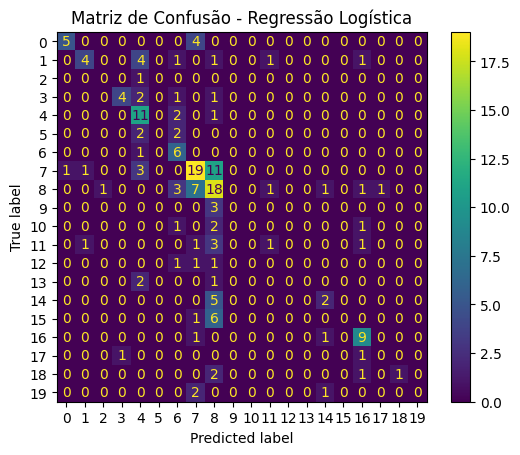

KNN - Acurácia (manual): 0.384 | Score (modelo): 0.384


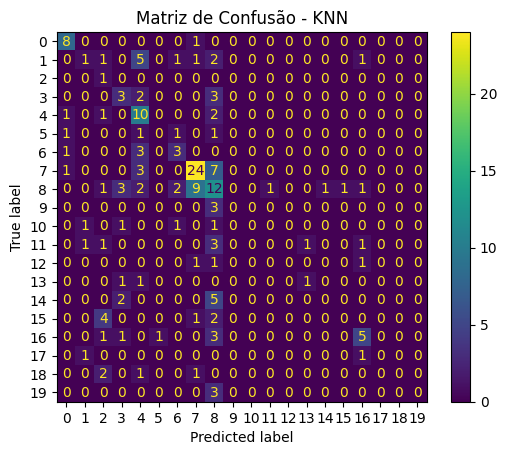

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Regressão Logística": make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=2000)
    ),
    "KNN": make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=5)
    )
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    score = model.score(X_test, y_test)

    accuracies[name] = score

    print(f"{name} - Acurácia (manual): {acc:.3f} | Score (modelo): {score:.3f}")

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()



### Algoritmos de classificação utilizados

Foram testados dois algoritmos clássicos de classificação supervisionada:

- **Regressão Logística**  
  Apesar do nome, trata-se de um algoritmo de **classificação**, que modela a probabilidade de cada classe por meio de uma função logística.  
  Ele busca encontrar uma fronteira aproximadamente **linear** que separe as diferentes culturas no espaço de atributos.

- **K-Vizinhos Mais Próximos (KNN)**  
  O KNN é um algoritmo baseado em similaridade.  
  Para classificar um novo personagem, o modelo procura os *k* vizinhos mais próximos no conjunto de treino (usando distância) e escolhe a classe mais comum entre eles.  
  Esse modelo é **não paramétrico** e pode capturar fronteiras de decisão não lineares.


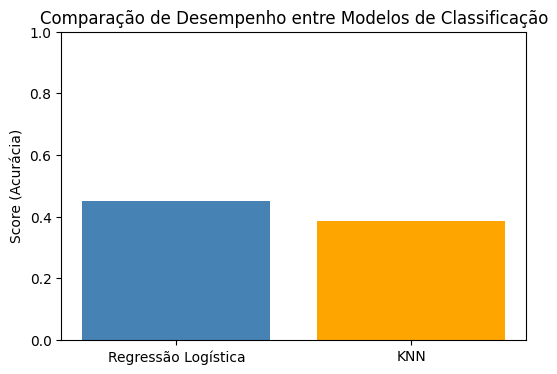

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(accuracies.keys(), accuracies.values(), color=["steelblue", "orange"])
plt.ylabel("Score (Acurácia)")
plt.title("Comparação de Desempenho entre Modelos de Classificação")
plt.ylim(0, 1)
plt.show()


### Comparação dos modelos

Após o pré-processamento e padronização das variáveis com `StandardScaler`, foram treinados dois modelos de classificação:

- **Regressão Logística**
- **K-Vizinhos Mais Próximos (KNN)**

Os resultados de acurácia no conjunto de teste foram:

- Regressão Logística: **0.452**
- KNN (k=5): **0.384**

A Regressão Logística apresentou melhor desempenho geral na tarefa de prever a cultura dos personagens, sugerindo que uma combinação linear dos atributos sociais, familiares e narrativos já é suficiente para capturar parte dos padrões culturais em Westeros.

O KNN teve desempenho inferior, o que pode estar relacionado à sensibilidade do algoritmo à distribuição dos dados e à mistura de atributos categóricos codificados (como `title`) com atributos contínuos (como `popularity`). Além disso, o valor de `k` não foi otimizado, o que também influencia diretamente o resultado.


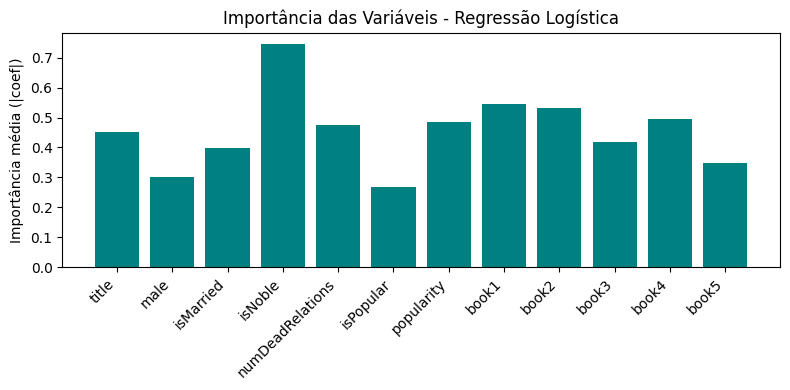

In [ ]:
import numpy as np

log_reg_pipeline = models["Regressão Logística"]
log_reg_model = log_reg_pipeline.named_steps["logisticregression"]

importance = np.mean(np.abs(log_reg_model.coef_), axis=0)

plt.figure(figsize=(8,4))
plt.bar(X.columns, importance, color="teal")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Importância média (|coef|)")
plt.title("Importância das Variáveis - Regressão Logística")
plt.tight_layout()
plt.show()


### Importância das variáveis na Regressão Logística

A análise dos coeficientes da Regressão Logística (após a padronização dos atributos) mostra quais variáveis têm maior impacto na predição da cultura.

De forma geral, atributos como:

- **`isNoble`**
- **`title`**
- **`popularity`**
- e presença em determinados livros (`book1` a `book5`)

têm influência maior nas decisões do modelo, o que faz sentido dentro da narrativa de Game of Thrones: a origem de um personagem está fortemente ligada à sua posição social, à sua relevância na história e à região onde atua.

